# IMU-Based Human Activity Recognition  
## Exploratory Data Analysis (EDA)

This notebook focuses on exploratory analysis of raw IMU data collected using a wrist-mounted Nicla Vision device.  
The objective is to understand signal characteristics, distributions, and activity-wise behavior before feature engineering and model development.


## 1. Import Required Libraries

This section imports all libraries required for data handling, visualization, and numerical analysis.


In [1]:
#data handling 
import pandas as pd

#numerical computation
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
from sklearn.preprocessing import MinMaxScaler

#utility
import os

## 2. Dataset Overview

In this section, raw IMU CSV files for each activity are loaded and inspected to verify structure, column names, and sample counts.


In [2]:
# Define base path for raw data
DATA_PATH = "../data/Raw data"

# List available activity files
activities = os.listdir(DATA_PATH)
activities


['brisk walking.csv',
 'cycling.csv',
 'eating.csv',
 'jogging.csv',
 'phone interaction.csv',
 'pick and place.csv',
 'sit-stand-sit.csv',
 'sitting.csv',
 'stair-down.csv',
 'stair-up.csv',
 'standing.csv',
 'walking.csv']

## 3. Raw Signal Visualization (Accelerometer vs Gyroscope)

This section visualizes the relationship between accelerometer and gyroscope signals for different activities to understand motion intensity and variability.


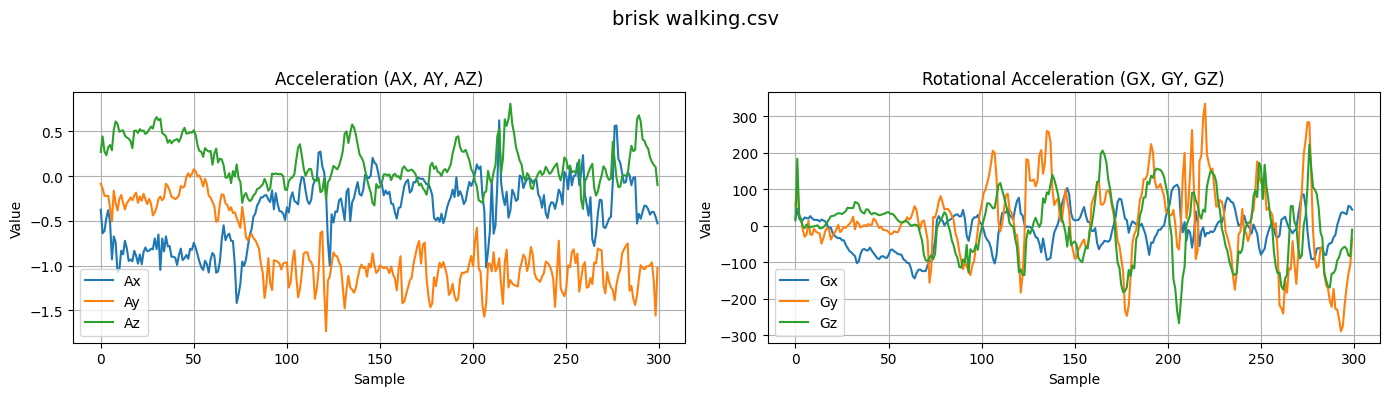

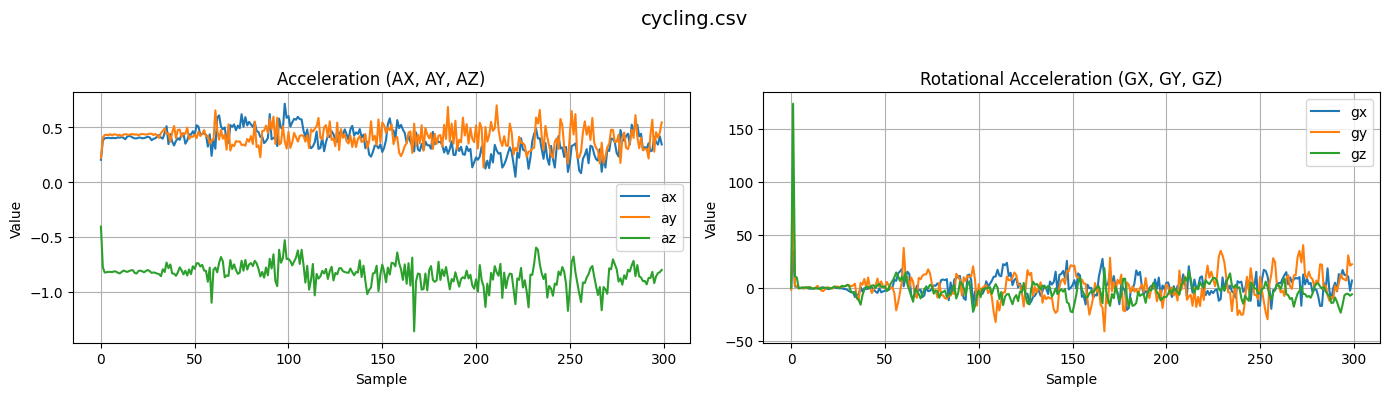

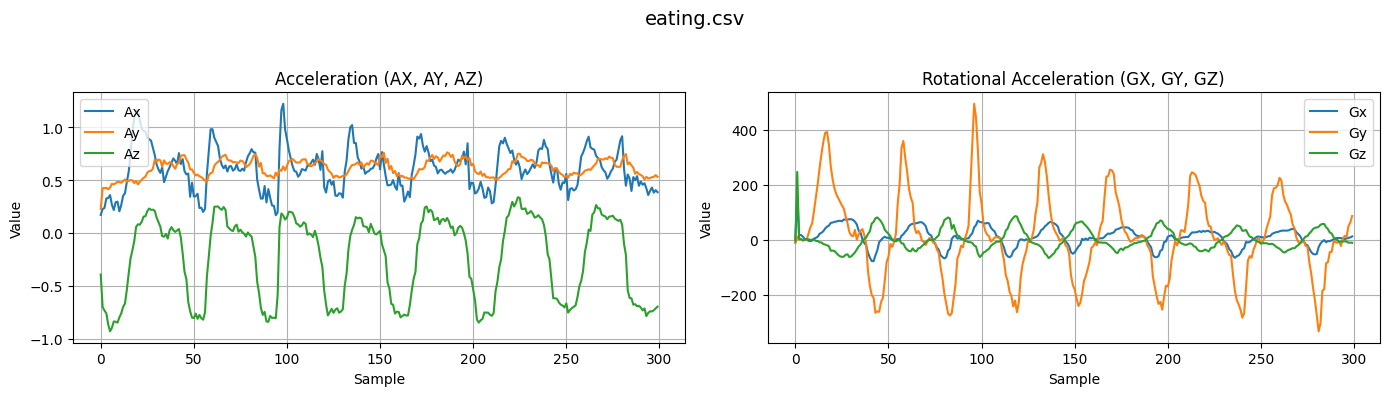

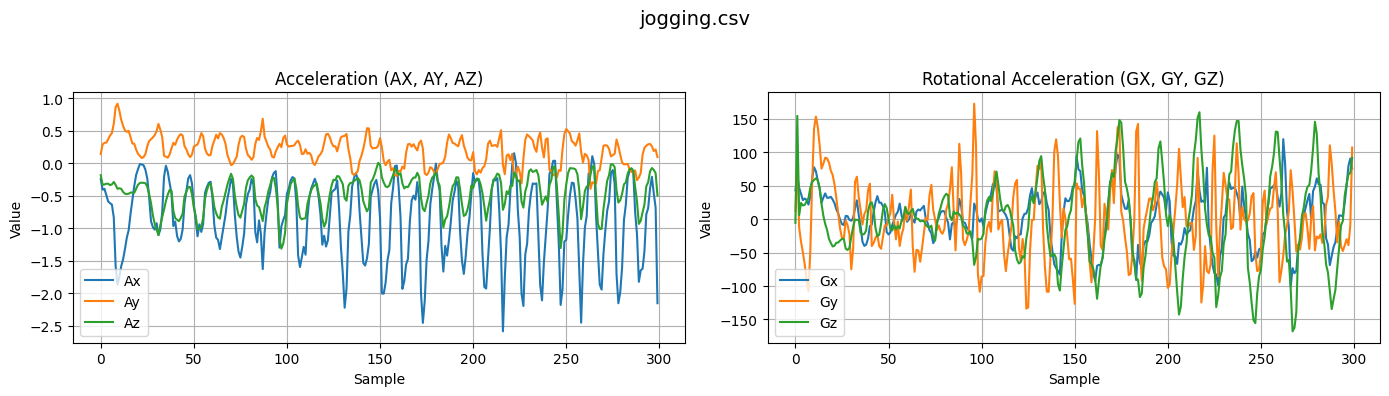

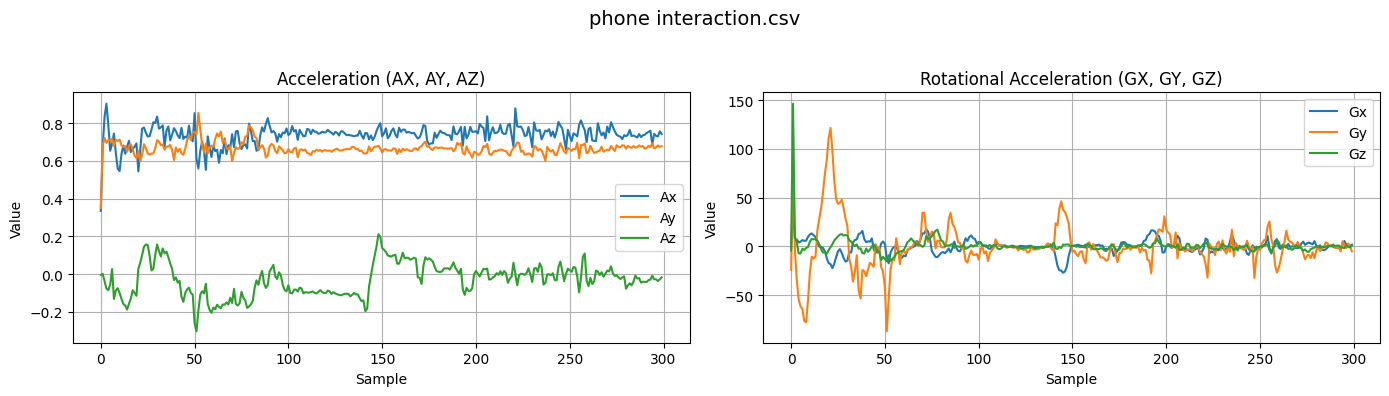

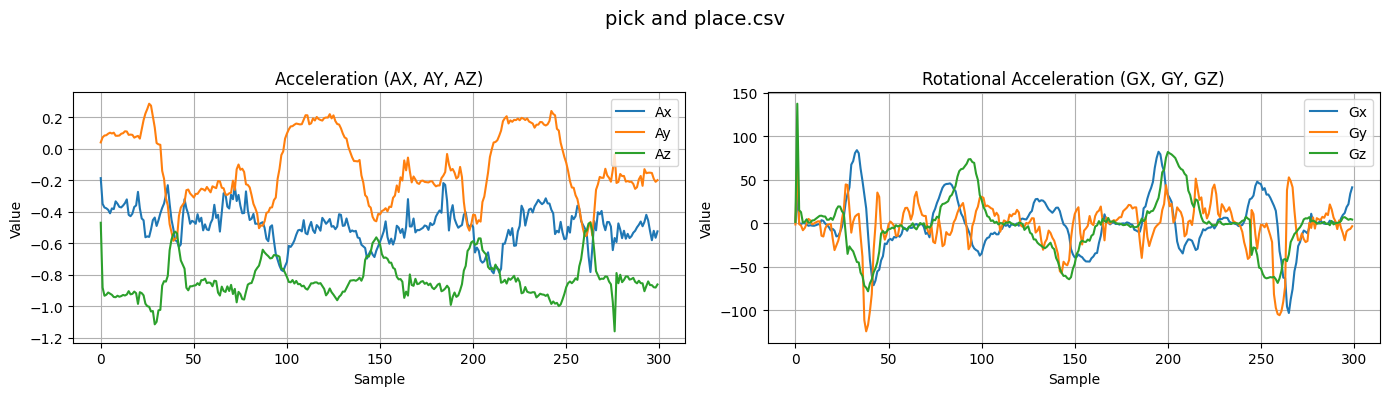

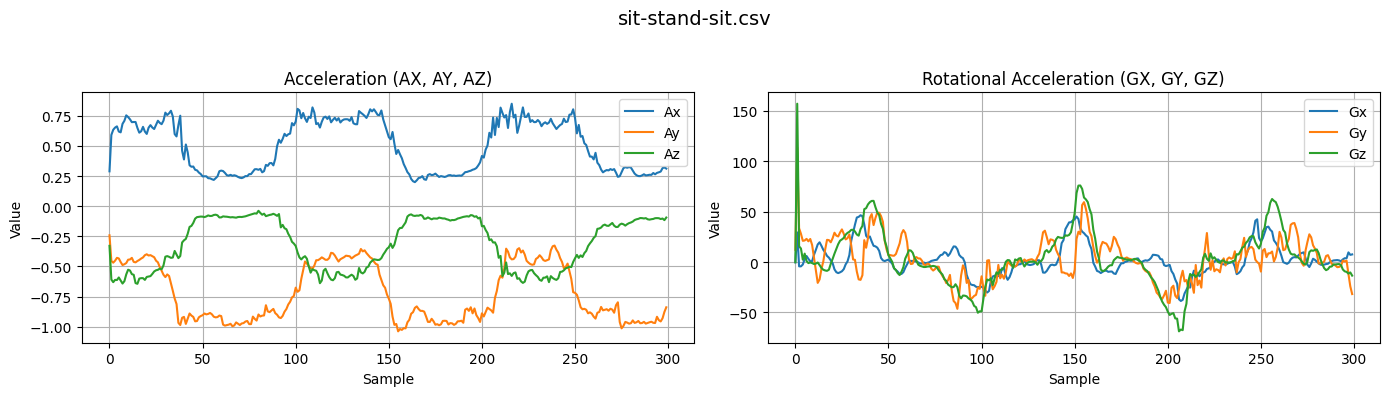

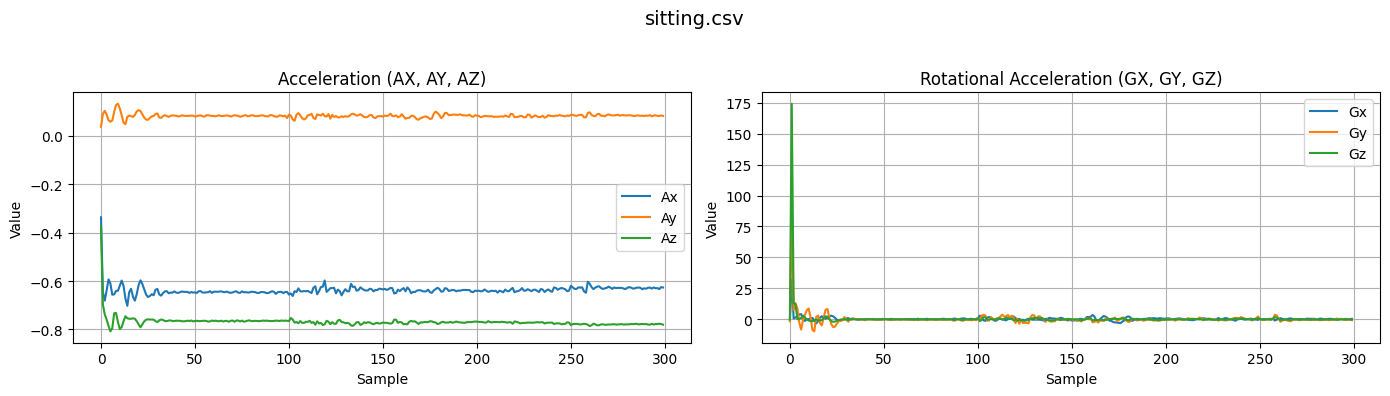

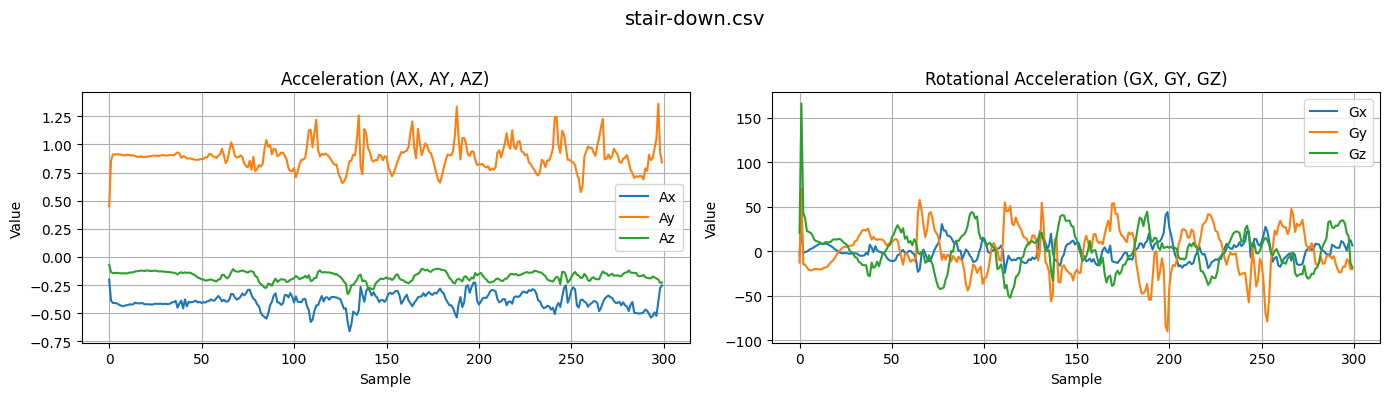

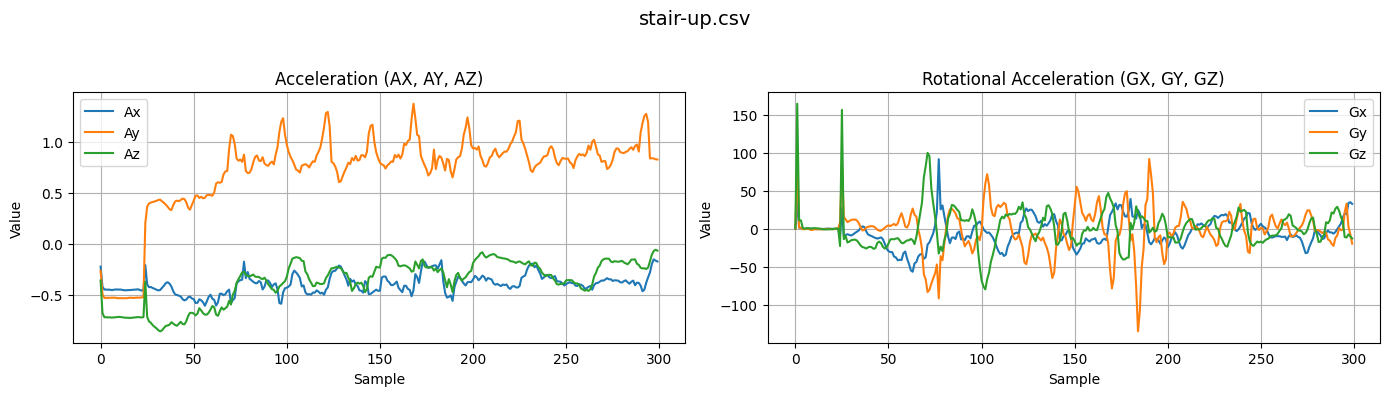

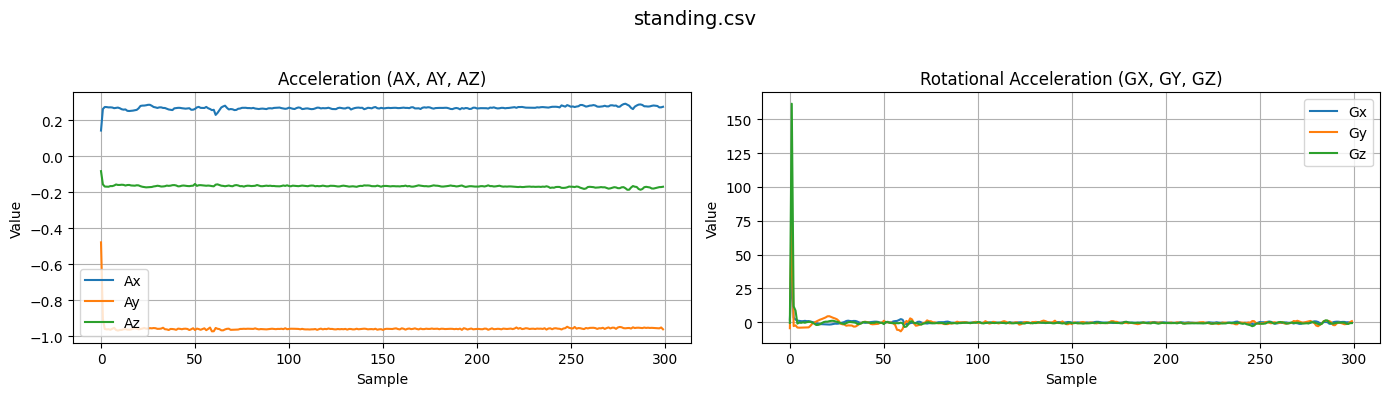

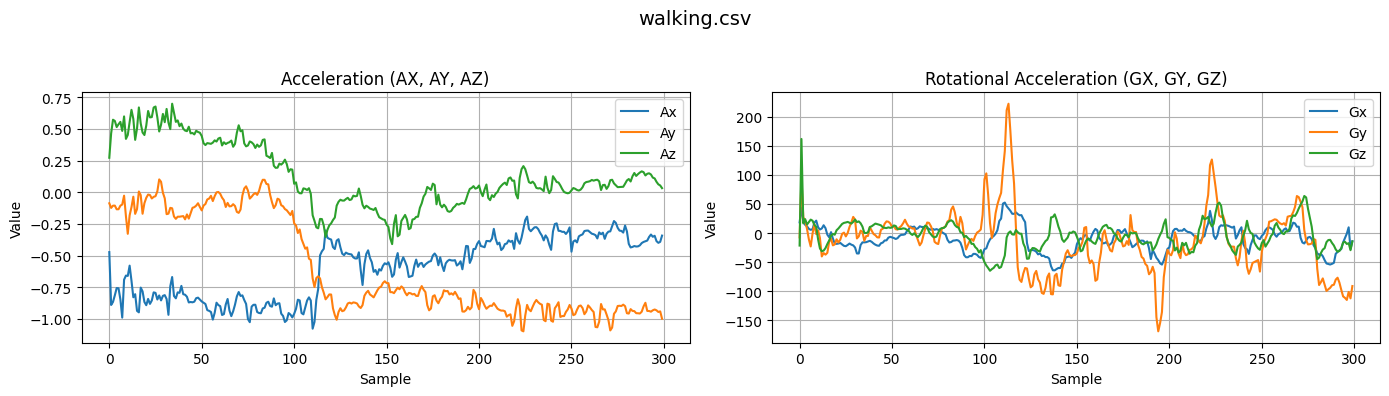

In [3]:
save_dir = "../results/time_domain_signal"
os.makedirs(save_dir, exist_ok=True)

for act in activities:

    df = pd.read_csv(os.path.join(DATA_PATH, act))

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

    df.iloc[:300, 0:3].plot(ax=axes[0])
    axes[0].set_title("Acceleration (AX, AY, AZ)")
    axes[0].set_xlabel("Sample")
    axes[0].set_ylabel("Value")
    axes[0].grid()

    df.iloc[:300, 3:6].plot(ax=axes[1])
    axes[1].set_title("Rotational Acceleration (GX, GY, GZ)")
    axes[1].set_xlabel("Sample")
    axes[1].set_ylabel("Value")
    axes[1].grid()

    fig.suptitle(act, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # ✅ SAVE FIRST
    fig.savefig(
        os.path.join(save_dir, f"{act}_acc_vs_gyro.jpg"),
        dpi=300,
        bbox_inches="tight"
    )

    plt.show()
    plt.close(fig)


## 4. Signal Distribution Analysis (KDE Plots)

Kernel Density Estimation (KDE) plots are used to analyze the distribution of IMU signals across activities.  
This helps identify overlap between activities and assess signal spread.


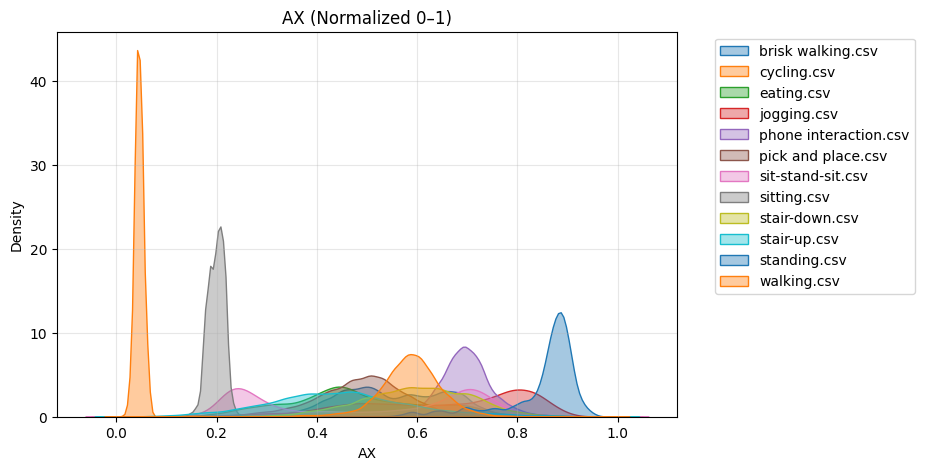

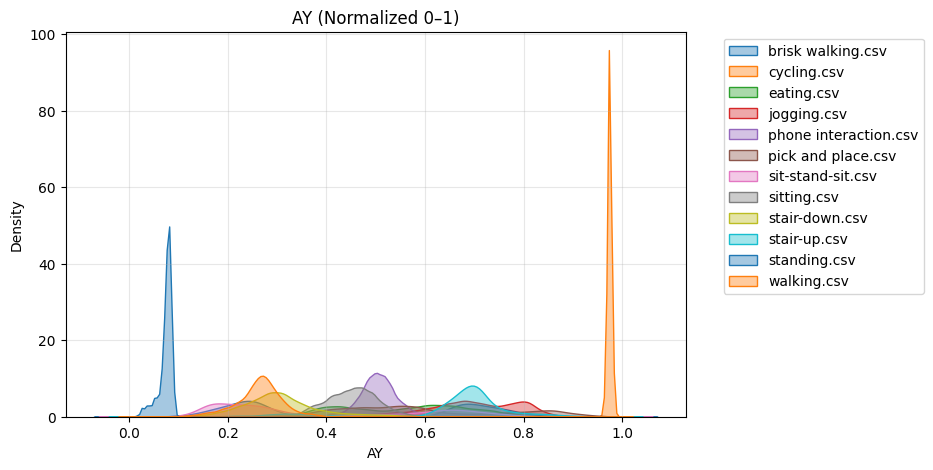

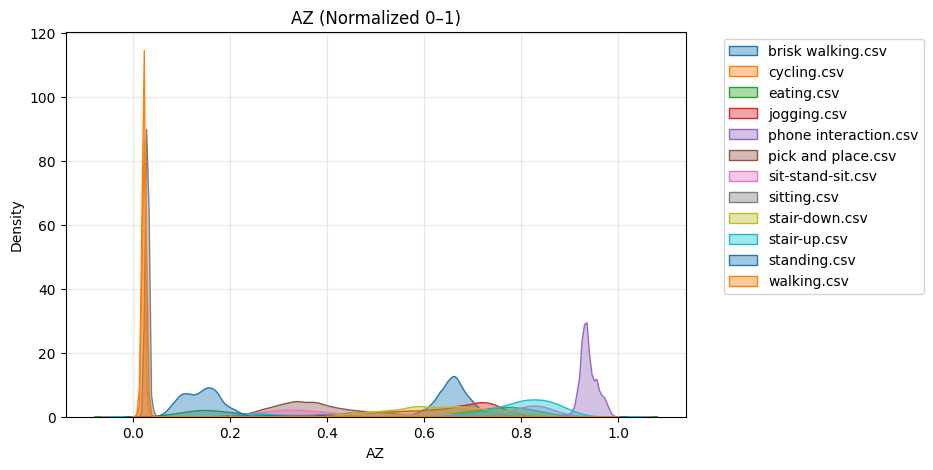

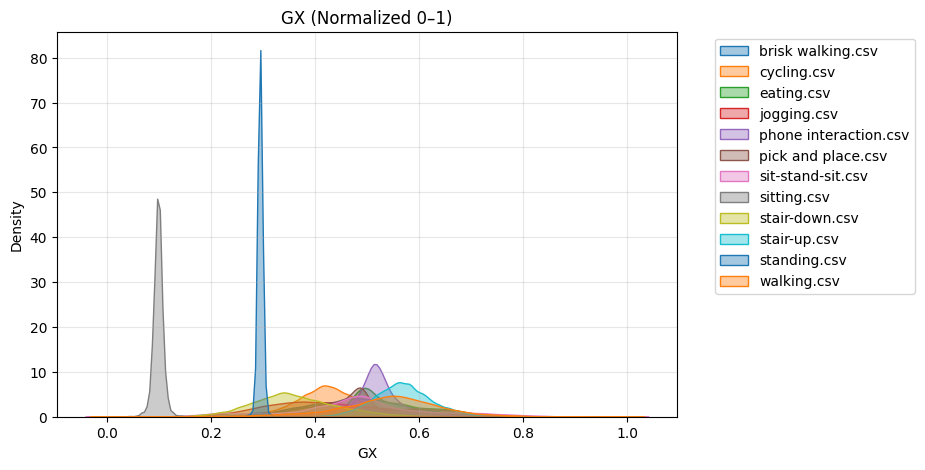

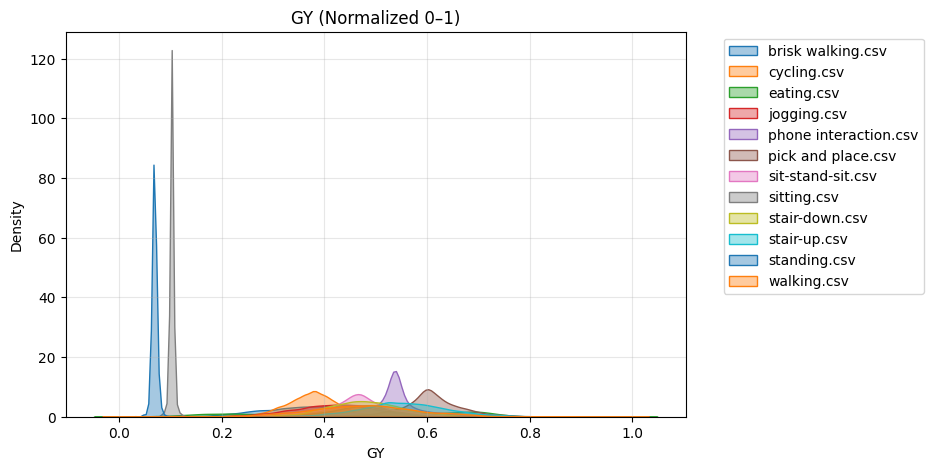

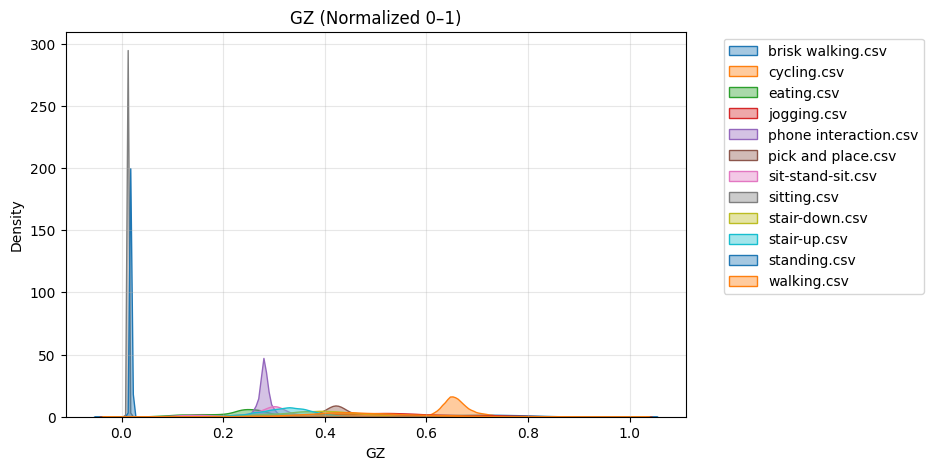

In [4]:
channels = [0, 1, 2, 3, 4, 5]   # AX AY AZ GX GY GZ by index
channel_names = ["AX", "AY", "AZ", "GX", "GY", "GZ"]

save_dir = "../results/KDE_plots"
os.makedirs(save_dir, exist_ok=True)

for ch, ch_name in zip(channels, channel_names):
    plt.figure(figsize=(8, 5))

    for act in activities:
        df_raw = pd.read_csv(os.path.join(DATA_PATH, act))
        df_plot = df_raw.copy()

        #normalizing the data
        scaler = MinMaxScaler()
        df_plot.iloc[:, ch:ch+1] = scaler.fit_transform(df_plot.iloc[:, ch:ch+1])

        sns.kdeplot(
            x=df_plot.iloc[:, ch],
            label=act,
            fill=True,
            alpha=0.4,
            bw_adjust=0.6,
            common_norm=False
        )

    plt.title(f"{ch_name} (Normalized 0–1)")
    plt.xlabel(ch_name)
    plt.ylabel("Density")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(alpha=0.3)
    plt.savefig(f"{save_dir}/KDE_{ch_name}.jpg", dpi=300, bbox_inches="tight")

## 5. Box Plot Analysis

Box plots are used to compare the statistical spread of IMU signals across different activities.  
They highlight median values, interquartile ranges, and outliers.


In [ ]:
channel_labels = ["AX", "AY", "AZ", "GX", "GY", "GZ"]

save_dir = "../results/box_plots"
os.makedirs(save_dir, exist_ok=True)

for act in activities:
    df = pd.read_csv(os.path.join(DATA_PATH, act))

    # take first 6 columns by INDEX only
    data = df.iloc[:, 0:6]

    # reshape for seaborn
    df_long = data.melt(var_name="Channel", value_name="Value")
    df_long["Channel"] = channel_labels * (len(df_long) // 6)

    plt.figure(figsize=(8, 5))

    sns.boxplot(
        data=df_long,
        x="Channel",        # AX AY AZ GX GY GZ side by side
        y="Value",
        showfliers=False,   # hide outliers → solid blue boxes
        color="steelblue"
    )

    plt.title(f"{act} — Sensor Distribution")
    plt.xlabel("Sensor Channel")
    plt.ylabel("Value")
    plt.grid(axis="y", alpha=0.3)
    plt.savefig(f"{save_dir}/{act}_boxplot_6channels.jpg", dpi=300, bbox_inches="tight")
    

## 6. Activity-wise Observations

Based on the visualizations above, key characteristics of different activity categories are identified:
- Static activities
- Dynamic activities
- Transitional activities


## 7. Summary of Exploratory Analysis

- Static activities exhibit low variance and near-constant signal values  
- Dynamic activities show higher variance and periodic motion patterns  
- Transitional activities display mixed characteristics  
- Overlapping distributions explain certain misclassifications observed later
